In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import OrdinalEncoder
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
data = pd.read_csv('Baza_uczniow_CIT.csv', index_col = 'index')

In [4]:
data.head()

,name,sex,age,language,level,hobby,type
index,,,,,,,
1,Adrianna,Kobieta,11,francuski,B1,piłka ręczna,stacjonarnie
2,Edward,Mężczyzna,17,francuski,A1,koszykówka,zdalnie
3,Monika,Kobieta,17,angielski,B1,koszykówka,zdalnie
4,Monika,Kobieta,16,niemiecki,A1,malowanie,zdalnie
5,Jakub,Mężczyzna,21,angielski,C1,anime,zdalnie


In [5]:
# Inspect the data type
data.info()
# Inspect the categorical variables
data.select_dtypes('object').nunique()
# Inspect the numerical variables
data.describe()
# Check missing value
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      300 non-null    object
 1   sex       300 non-null    object
 2   age       300 non-null    int64 
 3   language  300 non-null    object
 4   level     300 non-null    object
 5   hobby     300 non-null    object
 6   type      300 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.8+ KB


name        0
sex         0
age         0
language    0
level       0
hobby       0
type        0
dtype: int64

In [6]:
# Dividing students' hobbies into categories
sports = ['piłka ręczna', 'koszykówka', 'siatkówka', 'pływanie', 'jazda na rolkach','piłka nożna','jazda na rowerze','jazda konna', ]
music_dance = ['gra na pianino','gra na gitarze','gra na skrzypcach','gra na perkusji','muzyka','taniec towarzyski','taniec hip hop',]
creative = ['gry wideo','programowanie','anime','gry planszowe','malowanie', 'czytanie książek',]

def categorize_hobby(hobby):
    if hobby in sports:
        return 'sport'
    elif hobby in music_dance:
        return 'music'
    elif hobby in creative:
        return 'creative'
    else:
        return 'other'

data['hobby_type'] = data['hobby'].apply(categorize_hobby)

In [7]:
# Transformation of language proficiency levels into numerical values
oe = OrdinalEncoder(categories = [['A1', 'A2', 'B1', 'B2', 'C1', 'C2']])
data['level_num'] = oe.fit_transform(data[['level']])

In [8]:
# Dataframe of stationary students
intramural_english = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'angielski')][['age', 'level_num','hobby_type']]
intramural_german = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'niemiecki')][['age', 'level_num','hobby_type']]
intramural_french = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'francuski')][['age', 'level_num','hobby_type']]
intramural_spanish = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'hiszpański')][['age', 'level_num','hobby_type']]
intramural_italian = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'włoski')][['age', 'level_num','hobby_type']]
intramural_russian = data[(data['type'] == 'stacjonarnie') & (data['language'] == 'rosyjski')][['age', 'level_num','hobby_type']]

In [9]:
# Dataframe of remote students
remote_english = data[(data['type'] == 'zdalnie') & (data['language'] == 'angielski')][['age', 'level_num','hobby_type']]
remote_german = data[(data['type'] == 'zdalnie') & (data['language'] == 'niemiecki')][['age', 'level_num','hobby_type']]
remote_french = data[(data['type'] == 'zdalnie') & (data['language'] == 'francuski')][['age', 'level_num','hobby_type']]
remote_spanish = data[(data['type'] == 'zdalnie') & (data['language'] == 'hiszpański')][['age', 'level_num','hobby_type']]
remote_italian = data[(data['type'] == 'zdalnie') & (data['language'] == 'włoski')][['age', 'level_num','hobby_type']]
remote_russian = data[(data['type'] == 'zdalnie') & (data['language'] == 'rosyjski')][['age', 'level_num','hobby_type']]

In [10]:
# Convert dataframe to array
intramural_english_array = intramural_english.to_numpy()
intramural_german_array = intramural_german.to_numpy()
intramural_french_array = intramural_french.to_numpy()
intramural_spanish_array = intramural_spanish.to_numpy()
intramural_italian_array = intramural_italian.to_numpy()
intramural_russian_array = intramural_russian.to_numpy()

remote_english_array = remote_english.to_numpy()
remote_german_array = remote_german.to_numpy()
remote_french_array = remote_french.to_numpy()
remote_spanish_array = remote_spanish.to_numpy()
remote_italian_array = remote_italian.to_numpy()
remote_russian_array = remote_russian.to_numpy()


In [11]:
#Tuple of possible intramural/remote and language combinations
all_combinations = [
intramural_english_array, intramural_german_array, intramural_french_array, intramural_spanish_array, intramural_italian_array, intramural_russian_array, 
remote_english_array, remote_german_array, remote_french_array, remote_spanish_array, remote_italian_array, remote_russian_array, 
]
all_combinations_names = [
    'Intramural English', 'Intramural German', 'Intramural French', 'Intramural Spanish', 'Intramural Italian', 'Intramural Russian', 
    'Remote English', 'Remote German', 'Remote French', 'Remote Spanish', 'Remote Italian', 'Remote Russian'
]

# Create a dictionary to store arrays with their names as keys
combination_dict = {}
for name, combination in zip(all_combinations_names, all_combinations):
    combination_dict[name] = combination

Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13


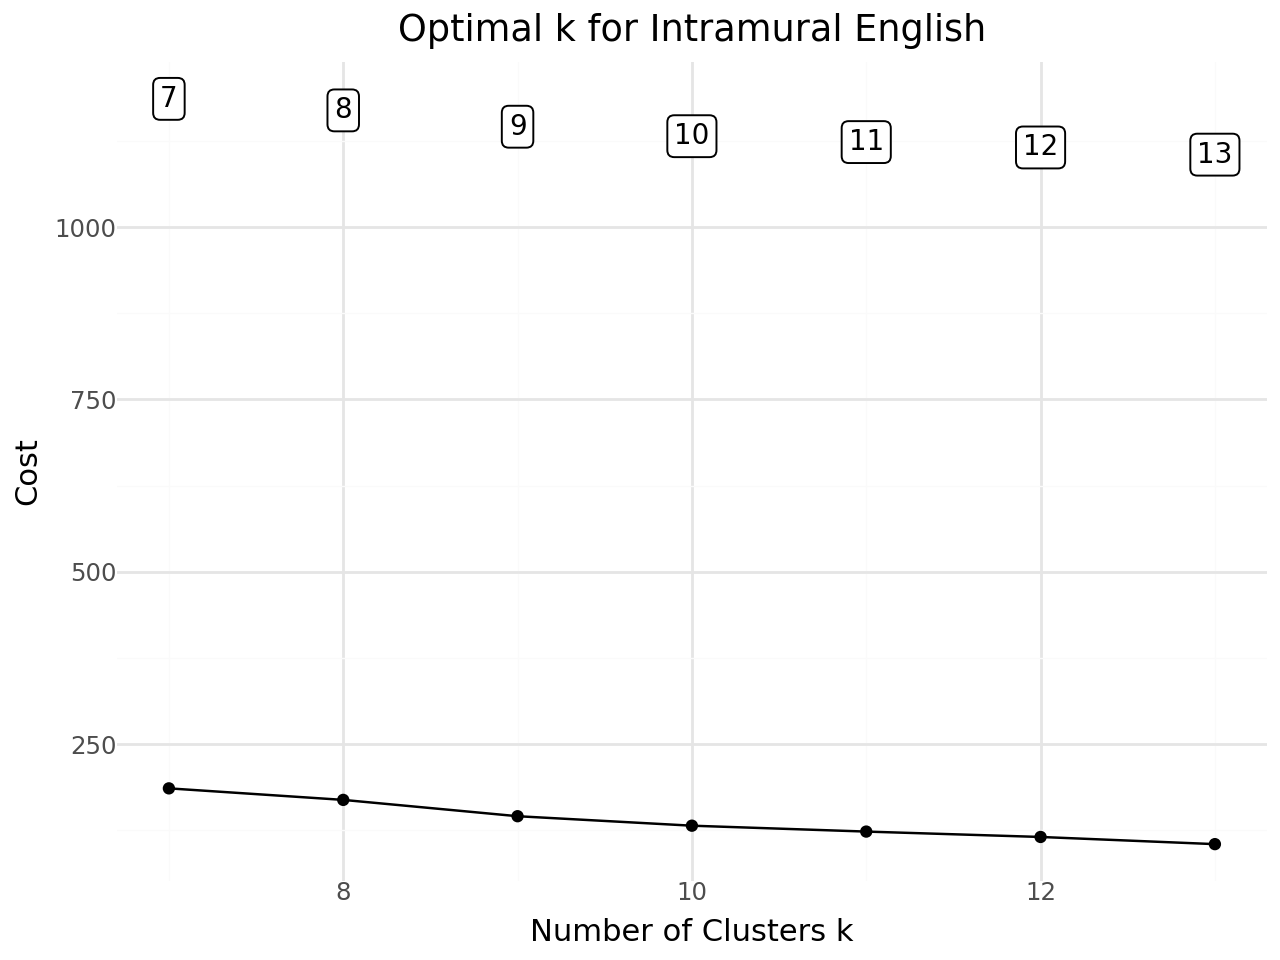

Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7


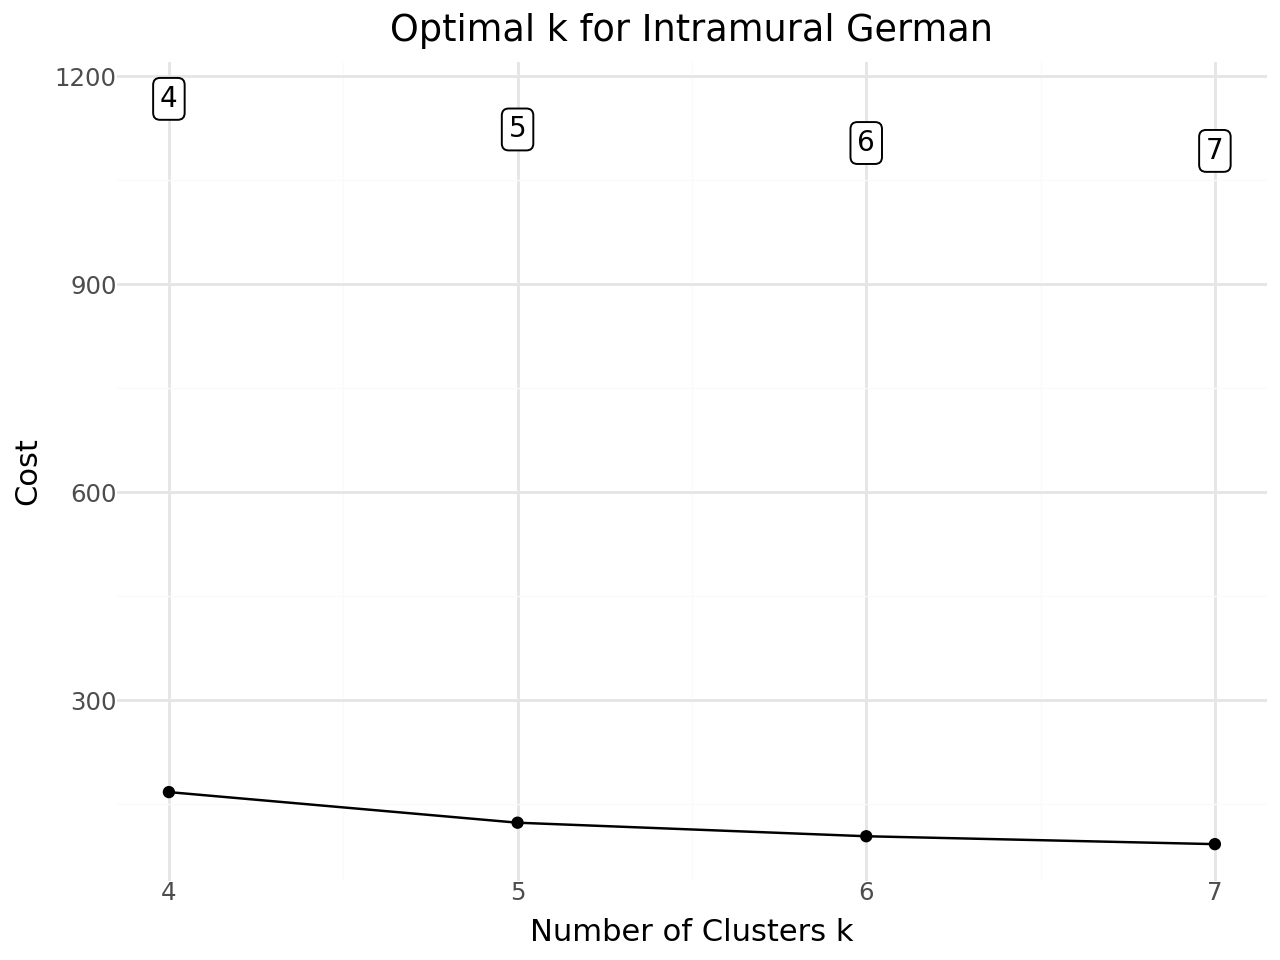

Cluster initiation: 2
Cluster initiation: 3


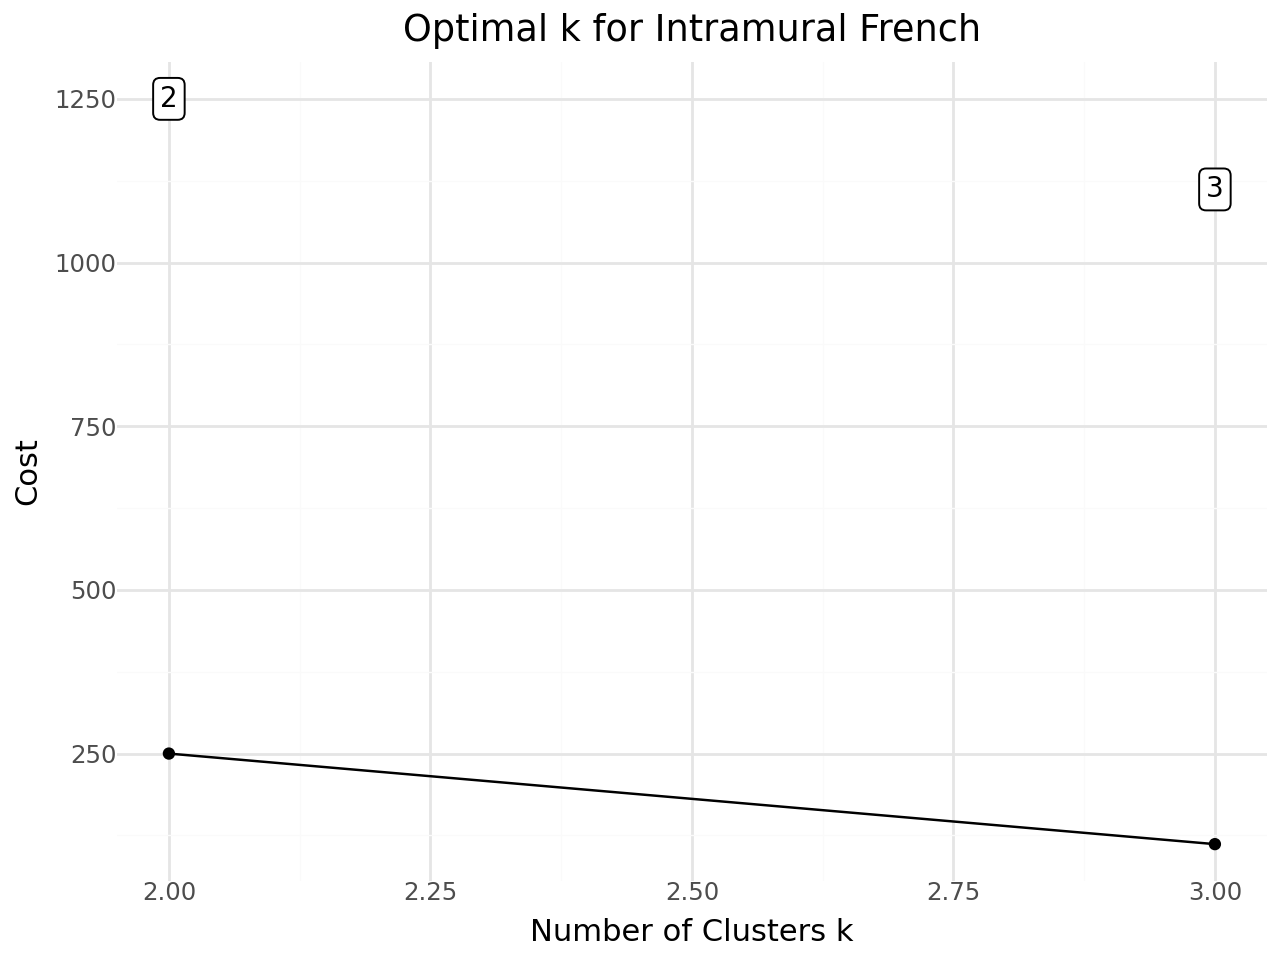

Cluster initiation: 2
Cluster initiation: 3


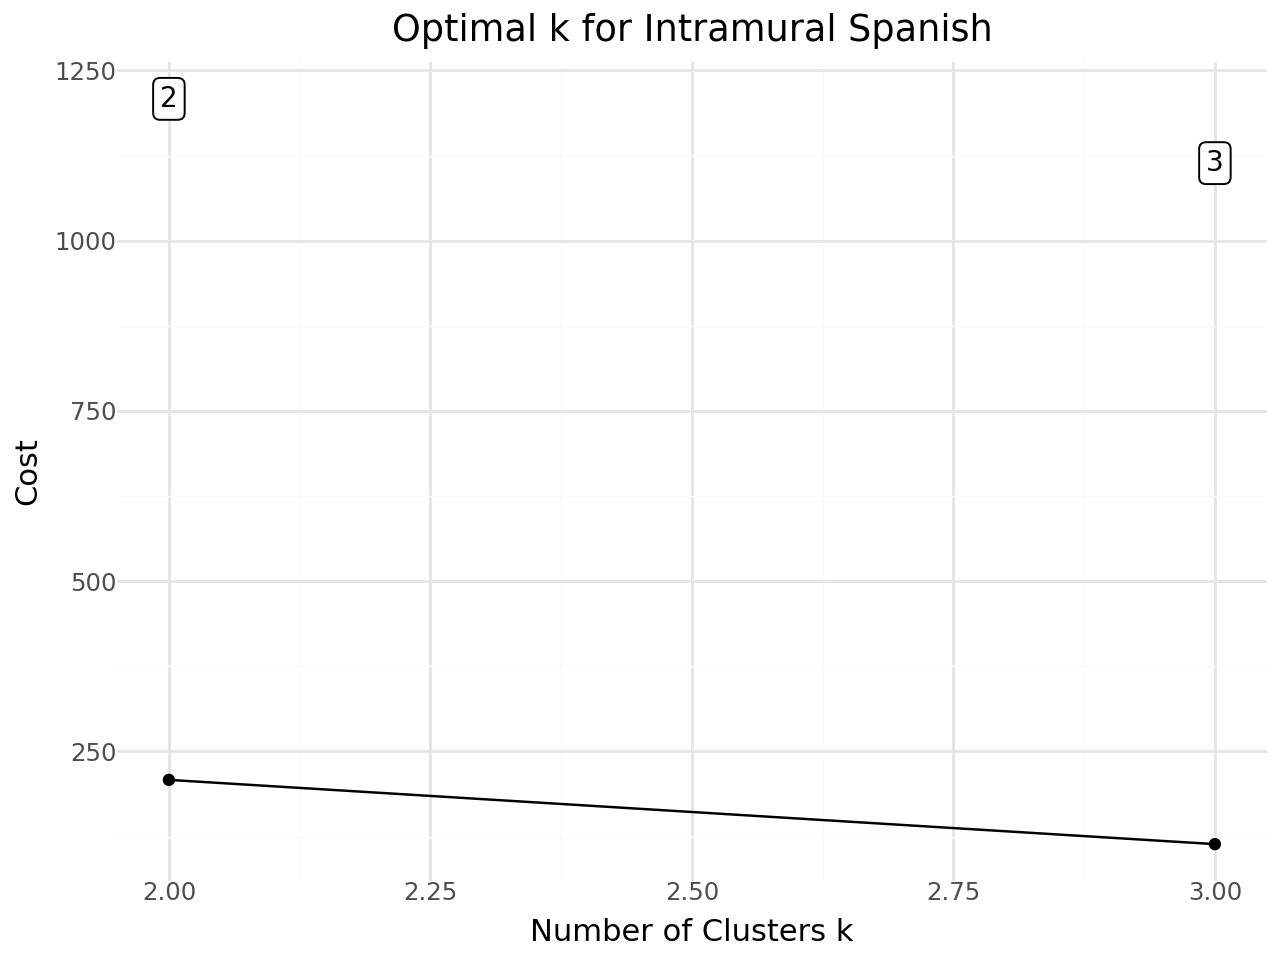

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


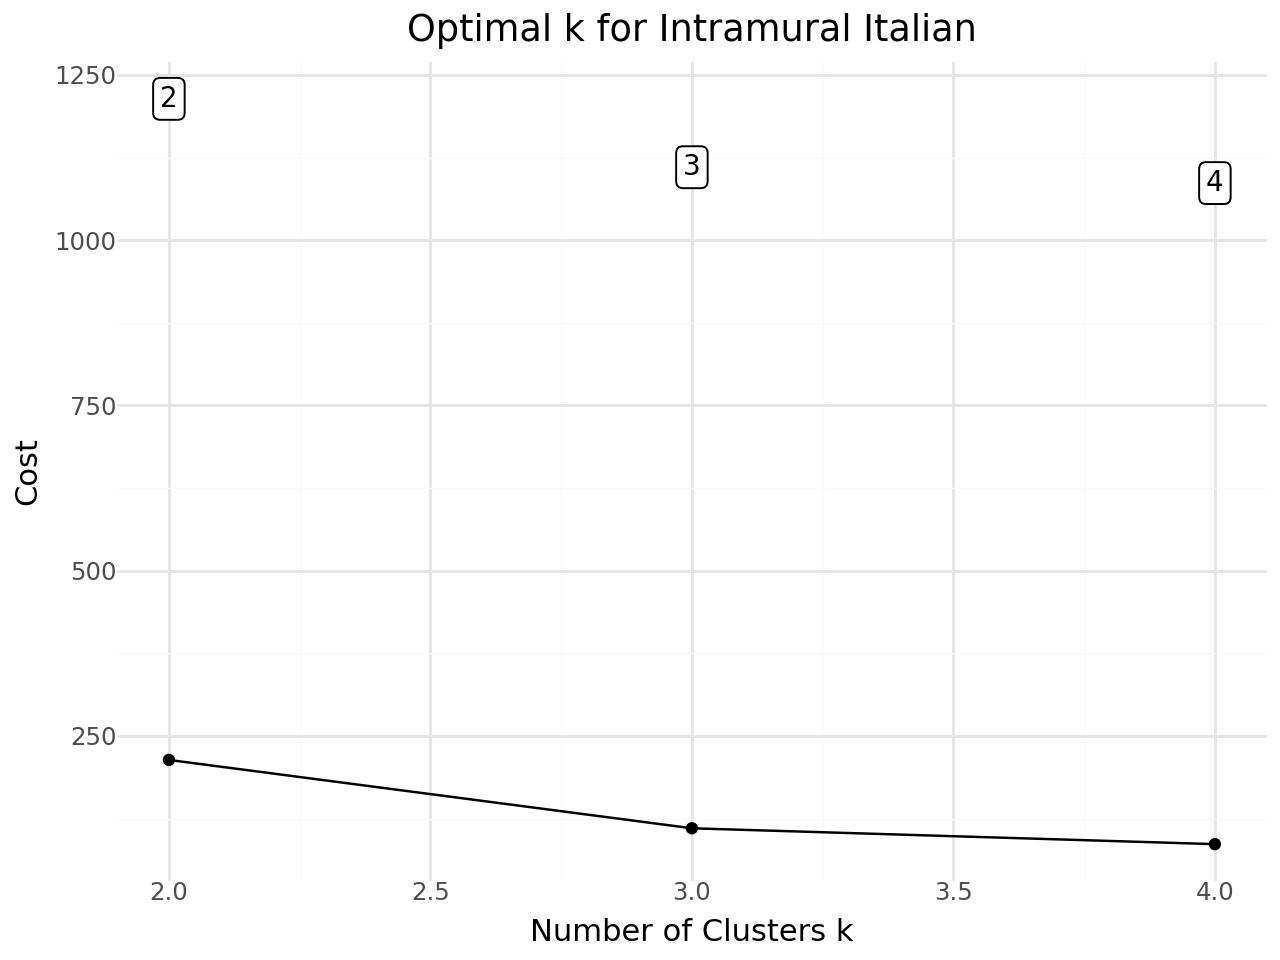

Cluster initiation: 1
Cluster initiation: 2


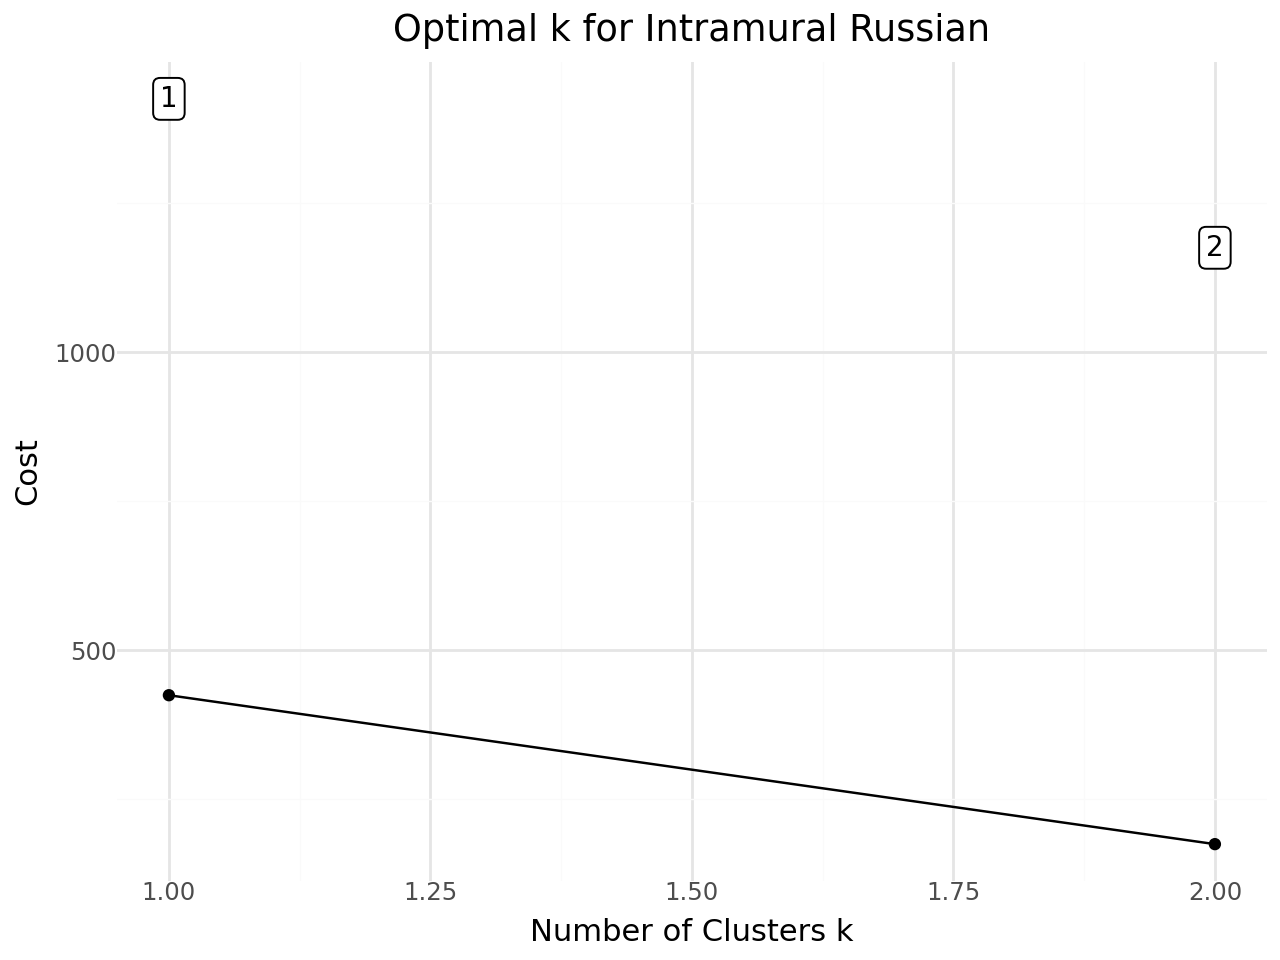

Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


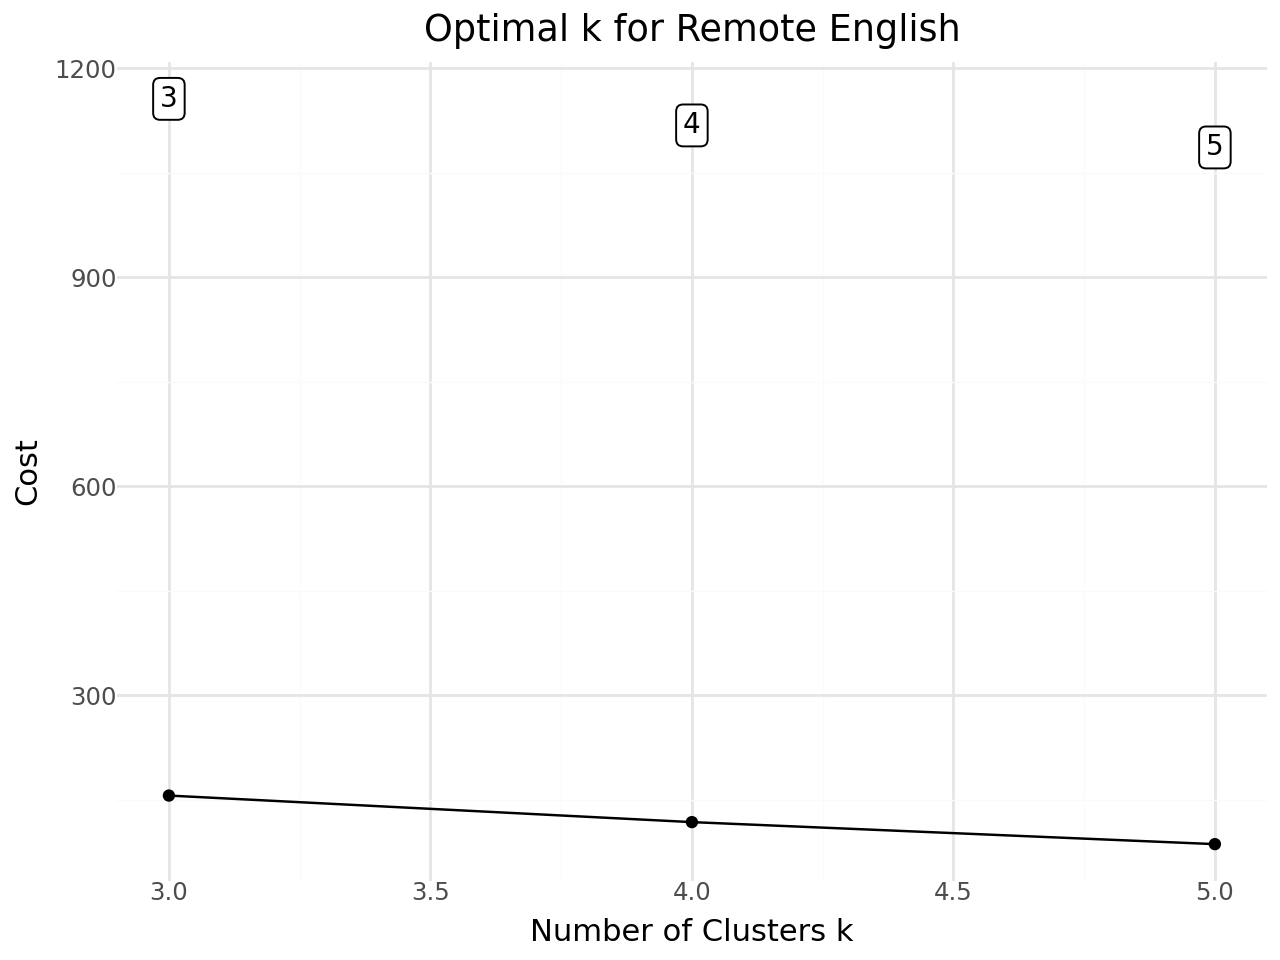

Cluster initiation: 1
Cluster initiation: 2


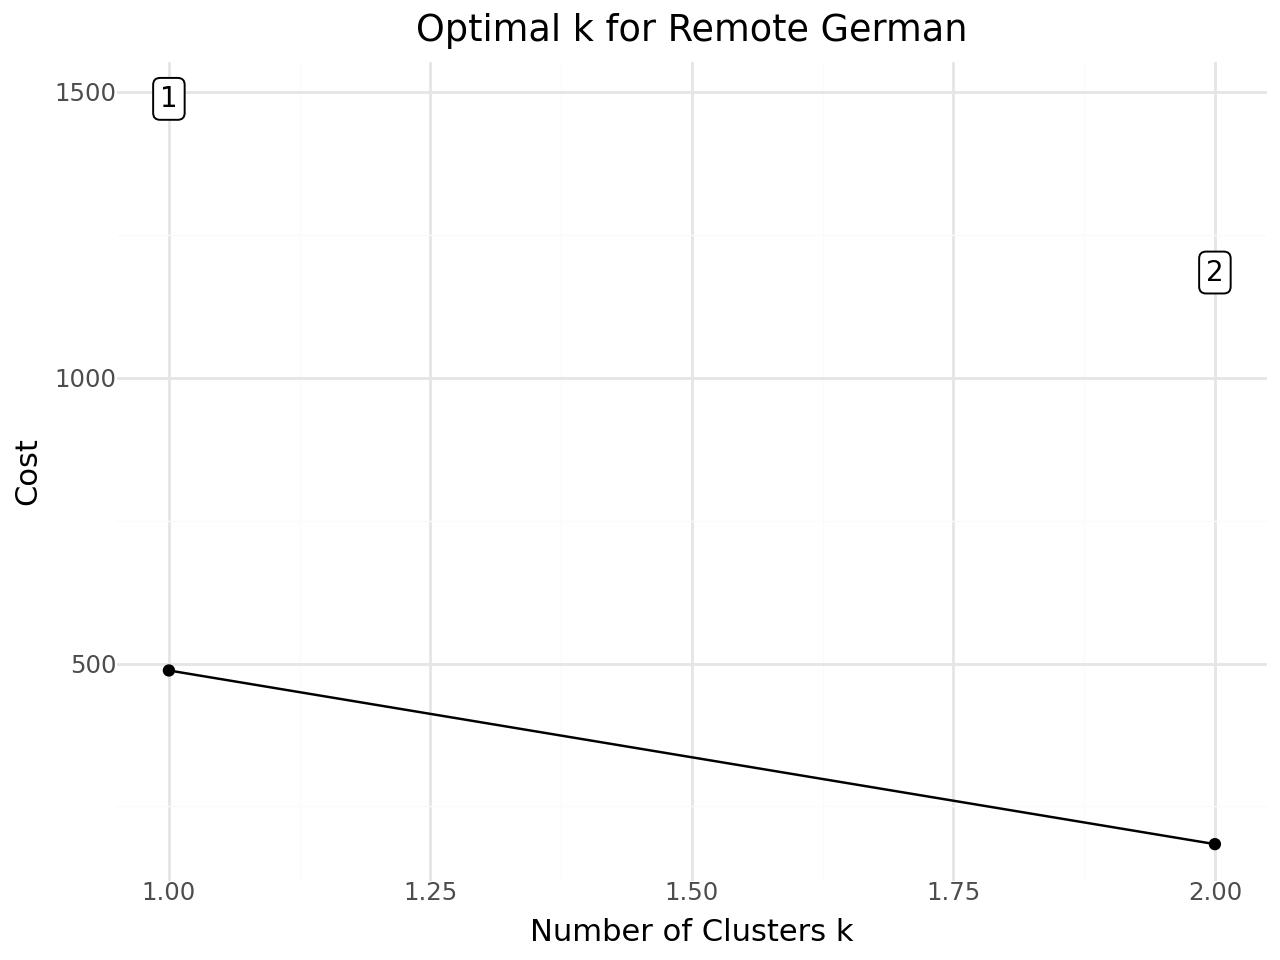

Cluster initiation: 1


C:\Users\Antoni\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


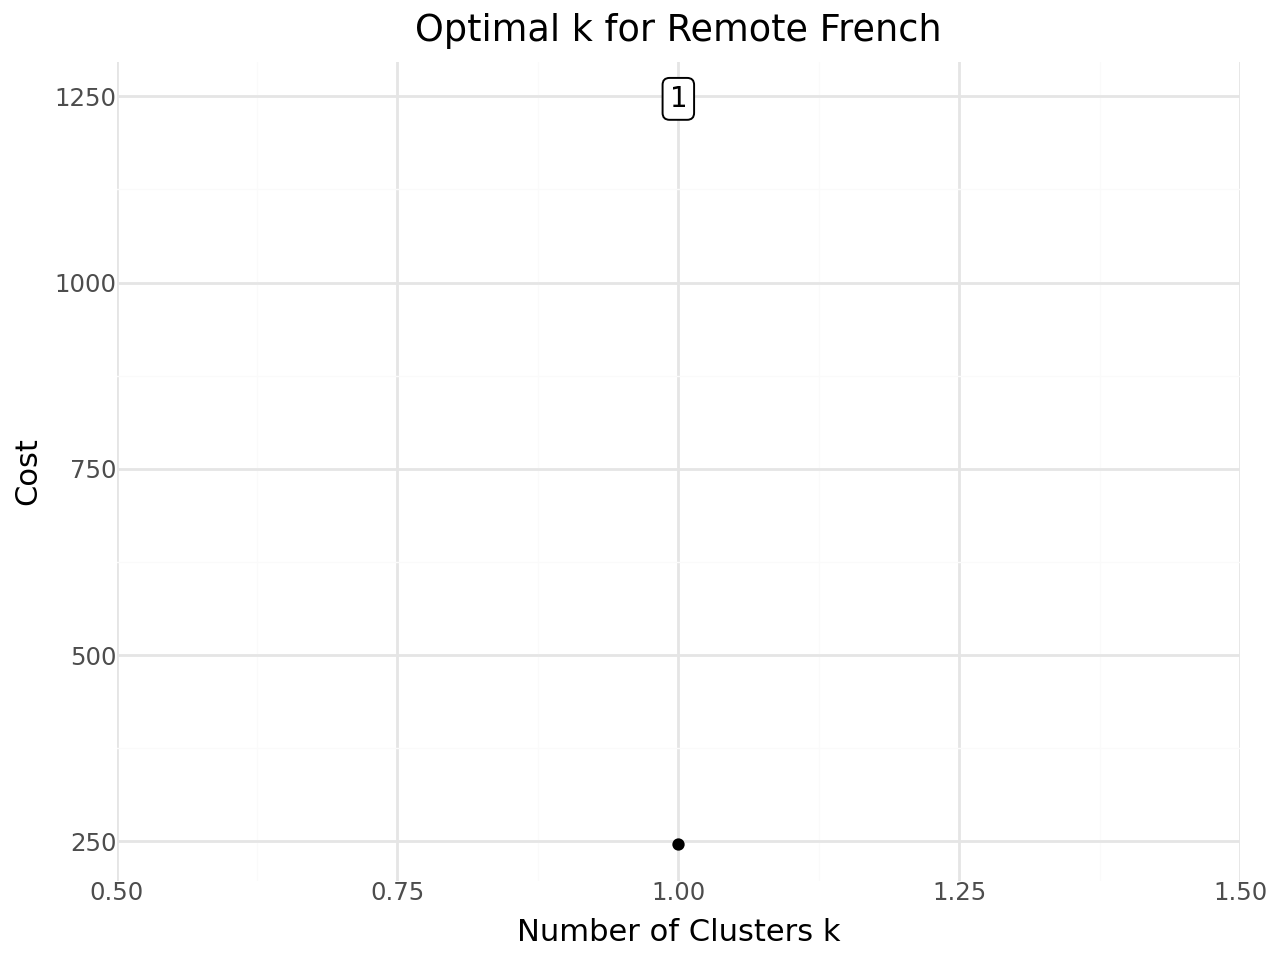

Cluster initiation: 1


C:\Users\Antoni\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


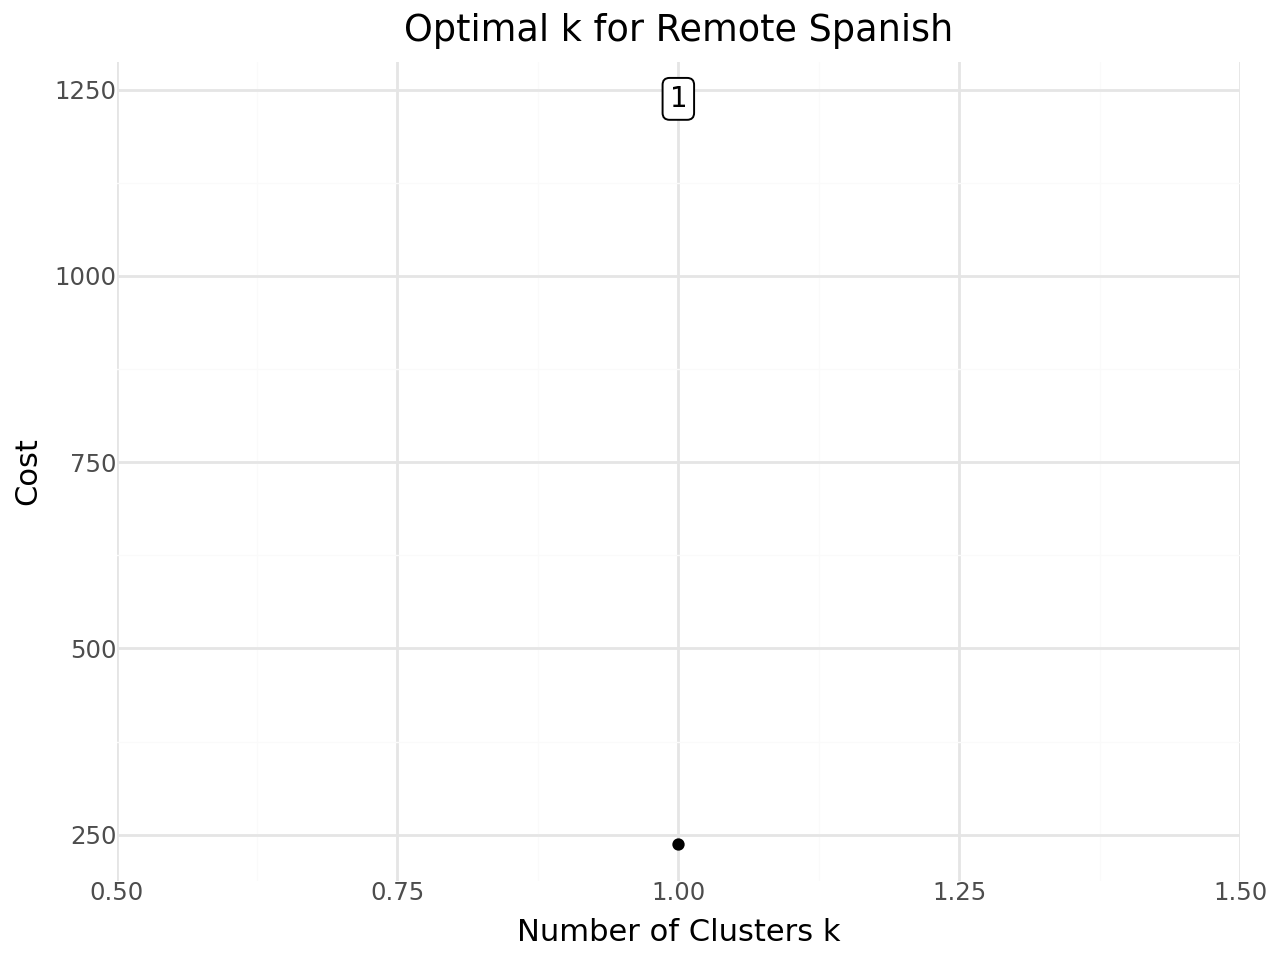

Cluster initiation: 2
Cluster initiation: 3


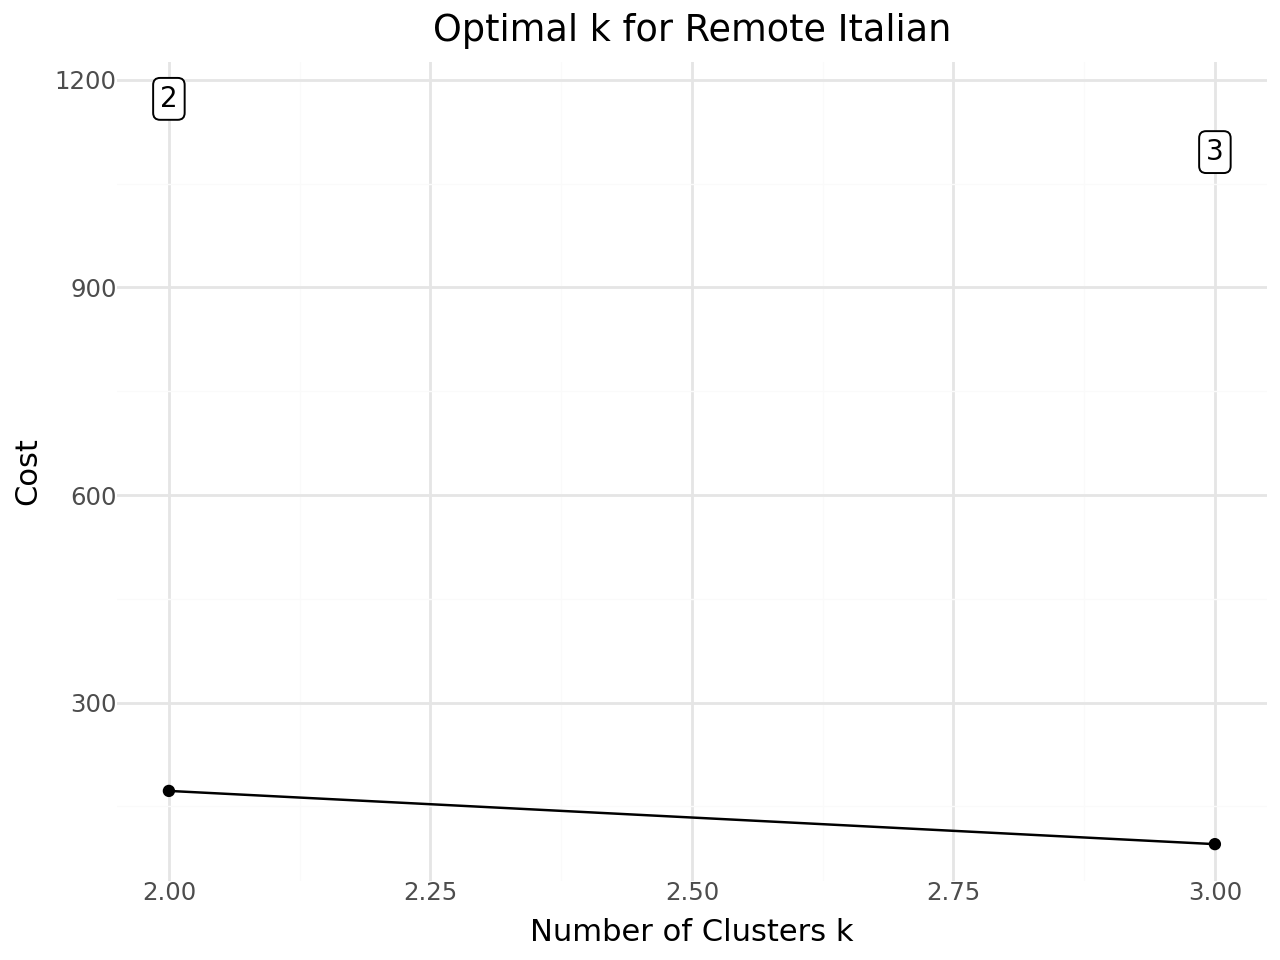

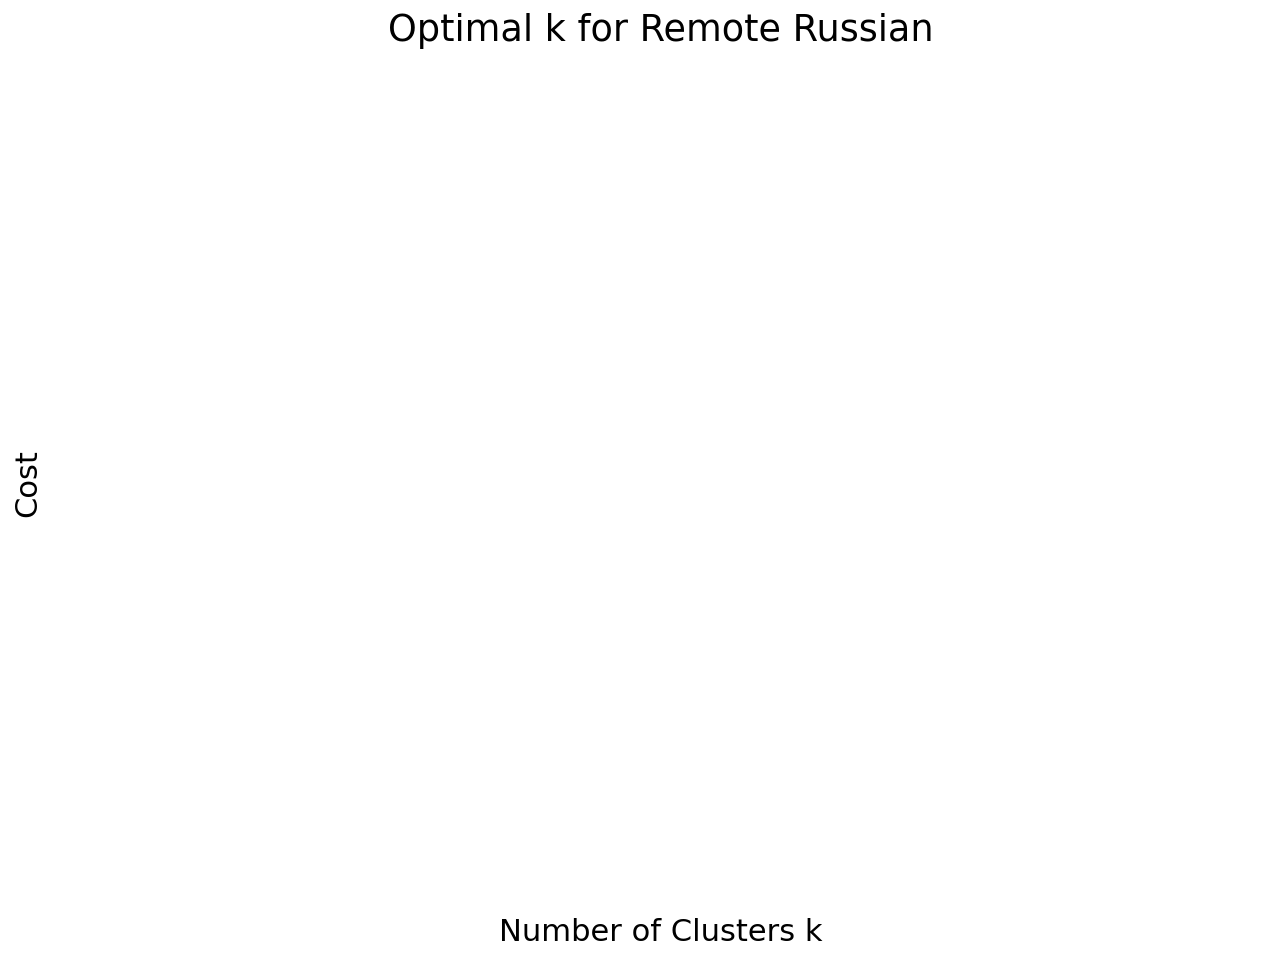

In [12]:
#creating barriers for number of people in groups, they should be 5-10 people
for name, combination in combination_dict.items():
    x = max(1, int(np.floor(len(combination) / 10)))
    y = max(1, int(np.floor(len(combination) / 5))) #i want to count to floor and ceil max value is not included in range
    # Choose optimal K using Elbow method
    cost = []
    for cluster in range(x, y):
        try:
            kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0) 
            kprototype.fit_predict(combination, categorical = [2])
            cost.append(kprototype.cost_)
            print('Cluster initiation: {}'.format(cluster))
        except Exception as e:
            print(f'Error: {e}')
            break
    # Converting the results into a dataframe and plotting them         
    df_cost = pd.DataFrame({'Cluster':range(x, y), 'Cost':cost})
    
    # Data viz
    plot = (
        ggplot(data=df_cost) +
        geom_line(aes(x='Cluster', y='Cost')) +
        geom_point(aes(x='Cluster', y='Cost')) +
        geom_label(aes(x='Cluster', y='Cost', label='Cluster'), size=10, nudge_y=1000) +
        labs(title=f'Optimal k for {name}') +
        xlab('Number of Clusters k') +
        ylab('Cost') +
        theme_minimal()
    )
    plot.show()

In [13]:
#School employee need to fill the optimal numbers for k considering the Elbow method and school possibilities (no of teachers, no of classrooms, etc.)

#Change a for chosen number of clusters
Intramural_English = 3
Intramural_German = 3
Intramural_French = 3
Intramural_Spanish = 3
Intramural_Italian = 3
Intramural_Russian = 3
Remote_English = 3
Remote_German = 3
Remote_French = 3
Remote_Spanish = 3
Remote_Italian = 3
Remote_Russian = 4

cluster_number_list = (Intramural_English, Intramural_German, Intramural_French, Intramural_Spanish, Intramural_Italian, Intramural_Russian, Remote_English, Remote_German, Remote_French, Remote_Spanish, Remote_Italian, Remote_Russian,)

(3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4)

In [14]:
# Fit the cluster
for k, combination in zip(cluster_number_list, all_combinations):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', random_state = 0)
    kprototype.fit_predict(combination, categorical = [2])
    # Cluster centorid
    kprototype.cluster_centroids_
    # Check the iteration of the clusters created
    kprototype.n_iter_
    # Check the cost of the clusters created
    kprototype.cost_